# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Fall 2022
- Instructor: Greg Ryslik
- Student Name: Shunian Xiang
- name.#: xiang.304
***

***
# Introduction

This homework will focus on a modified version of the kaggle dataset "Pima Indians Diabetes Database". It can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The overarching objective is to diagnostically predict whether or not a patient has diabetes based upon several other covariates. The full description is shown on the website.

Your task will be to first:
1) Do the prerequisite EDA to understand the data set you will be working on. 

2) Fit an appropriate logistic model and analyze it.

While some of the questions have exact answers, a few others are more open to interpretation. However, what we're looking for is the correct thinking ana analysis. For the objective questions, while some points are awarded for "the correct number", the majority of the points will be awarded for a proper analysis and logical investigation.

Note: The data has been modified in both some subtle and not-so-subtle ways. You're welcome to look at other previous work online (in kaggle, stack overflow, etc -- and in fact that's critical to learning how to write good code!) but be wary about just using other people's work. It would both be a violation of the academic code of conduct, but it may also lead you down the wrong path

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.


### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (10%)
> -	Is it well organized and does the presentation flow in a logical manner?
> -	Are there no grammar and spelling mistakes?
> -	Do the charts/graphs relate to the text?
> -	Are the summarized key points and findings understandable by non-experts?
> -	Do the Overview and Conclusions provide context for the entire exercise?
2.	Domain Understanding Phase (10%)
> -	Did you provide a reasonable level of information?
3.	Data Understanding Phase (30%)
> -	Did you find novel and/or interesting insights, or did you solely focus on simple summarizations of the data?
> -	Did you draw and present potential conclusion or observations from your analysis of the data?
> -	Did the statistics and visualizations you used make sense in the context of the data?
4.	Data Analysis Phase (40%)
> -   Did you correctly do the data cleaning steps and perform the appropriate logistic regression.
> -   Was your analysis of the significant variables appropriate.
> -   How have you justified your feature transformation and/or feature creation steps.
5.  Conclusions (10%)
> -   Did you summarize appropriately your critical findings. 
> -   Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	Project1_Surname_DotNumber.zip

The submitted file should be less than 10MB.


***

***
# Section 0: Setup
- Add any needed imports, helper functions, etc., here.
***

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.preprocessing import MinMaxScaler
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve


***
# Section: 1 - Domain Understanding
- Write a few paragraphs providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***

## Overview of the data
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. All patients here are females over 21 years old of Pima Indian heritage. The datasets consists of several medical predictor variables and one target variable 'Outcome'. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 
- The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.From this data set, researchers and medical professionals can generalize indicators that are highly relevant to diabetes patients.
- We assume that some indicators contribute to diabetes predictions, but such predictions can be highly volatile. The combination of multiple indicators can predict diabetes outcomes more accurately. Some of the indicators are not helpful individually, but they can be very illuminating when looked at together with other indicators.

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data (although that's a good first step!). Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the outcome.
***

In [142]:
data = pd.read_csv("diabetes_hw_data_3494.csv")

In [143]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,144,82.0,26.0,285.0,32.0,0.452,58.0,1
1,5.0,137,108.0,0.0,0.0,48.8,0.227,37.0,1
2,5.0,109,75.0,26.0,0.0,36.0,0.546,60.0,0
3,3.0,113,50.0,10.0,85.0,29.5,0.626,25.0,0
4,2.0,96,68.0,13.0,49.0,21.1,0.647,26.0,0
...,...,...,...,...,...,...,...,...,...
778,1.0,71,48.0,18.0,76.0,20.4,0.323,22.0,0
779,2.0,112,78.0,50.0,140.0,39.4,0.175,24.0,0
780,0.0,138,0.0,0.0,0.0,36.3,0.933,25.0,1
781,4.0,183,0.0,0.0,0.0,28.4,0.212,36.0,1


## attributes description
- Pregancies: Number of times pregnant.
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- BloodPressure: Diastolic blood pressure (mm Hg).
- SkinThickness: Triceps skin fold thickness (mm).
- Insulin: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function: A function that scores the likelihood of diabetes based on family history.
- Age: Age (years).

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [144]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,3.841635,121.280971,70.726692,20.968072,82.762452,32.360409,0.470271,34.444444,0.348659
std,3.366824,32.325356,31.374634,18.732339,121.761453,11.463401,0.330093,25.167961,0.476850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.350000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,504.000000,273.000000,846.000000,264.600000,2.420000,567.000000,1.000000


In [145]:
data['Outcome'].value_counts()

0    510
1    273
Name: Outcome, dtype: int64

In [146]:
data.quantile(q=[0, 0.01, .1, .25, .5, .75, .9, .99, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.07800,21.00,0.0
0.01,0.0,57.0,0.00,0.0,0.0,0.00,0.09528,21.00,0.0
0.10,0.0,85.0,54.00,0.0,0.0,23.62,0.16400,22.00,0.0
0.25,1.0,99.0,63.00,0.0,0.0,27.35,0.24200,24.00,0.0
0.50,3.0,117.0,72.00,23.0,36.0,32.00,0.37000,29.00,0.0
0.75,6.0,141.0,80.00,32.0,130.0,36.60,0.62500,41.00,1.0
0.90,9.0,168.0,88.00,40.0,215.0,42.08,0.87740,51.00,1.0
0.99,13.0,196.0,108.36,54.0,545.0,52.30,1.69818,67.18,1.0
1.00,17.0,199.0,504.00,273.0,846.0,264.60,2.42000,567.00,1.0


In [147]:
data.mean()

Pregnancies                   3.841635
Glucose                     121.280971
BloodPressure                70.726692
SkinThickness                20.968072
Insulin                      82.762452
BMI                          32.360409
DiabetesPedigreeFunction      0.470271
Age                          34.444444
Outcome                       0.348659
dtype: float64

In [148]:
data.median()

Pregnancies                   3.00
Glucose                     117.00
BloodPressure                72.00
SkinThickness                23.00
Insulin                      36.00
BMI                          32.00
DiabetesPedigreeFunction      0.37
Age                          29.00
Outcome                       0.00
dtype: float64

In [149]:
data.std()

Pregnancies                   3.366824
Glucose                      32.325356
BloodPressure                31.374634
SkinThickness                18.732339
Insulin                     121.761453
BMI                          11.463401
DiabetesPedigreeFunction      0.330093
Age                          25.167961
Outcome                       0.476850
dtype: float64

In [150]:
data.var()

Pregnancies                    11.335502
Glucose                      1044.928627
BloodPressure                 984.367663
SkinThickness                 350.900514
Insulin                     14825.851427
BMI                           131.409556
DiabetesPedigreeFunction        0.108962
Age                           633.426257
Outcome                         0.227386
dtype: float64

In [151]:
data.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               504.00
SkinThickness               273.00
Insulin                     846.00
BMI                         264.60
DiabetesPedigreeFunction      2.42
Age                         567.00
Outcome                       1.00
dtype: float64

In [152]:
data.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [153]:
data.max(numeric_only=True) - data.min(numeric_only=True)

Pregnancies                  17.000
Glucose                     199.000
BloodPressure               504.000
SkinThickness               273.000
Insulin                     846.000
BMI                         264.600
DiabetesPedigreeFunction      2.342
Age                         546.000
Outcome                       1.000
dtype: float64

In [154]:
data.mad()

Pregnancies                  2.770335
Glucose                     25.500330
BloodPressure               13.962749
SkinThickness               14.072975
Insulin                     87.718618
BMI                          6.151168
DiabetesPedigreeFunction     0.246672
Age                         11.001277
Outcome                      0.454192
dtype: float64

In [155]:
data.quantile(.75) - data.quantile(.25)

Pregnancies                   5.000
Glucose                      42.000
BloodPressure                17.000
SkinThickness                32.000
Insulin                     130.000
BMI                           9.250
DiabetesPedigreeFunction      0.383
Age                          17.000
Outcome                       1.000
dtype: float64

.***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

## histogram
- The histogram shows the distribution of values for a single variable.
- The histogram shows missing values, duplicate data, or outliers easily.

## Boxplots
- The boxplot is useful for visually representing the distribution of a single attribute.
- The boxplot can also show missing values, duplicate data, or outliers easily.

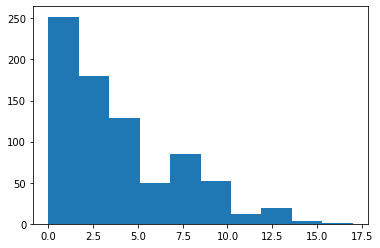

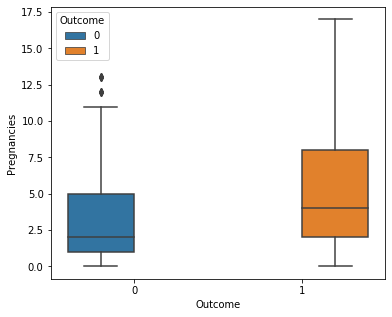

In [156]:
plt.hist(data['Pregnancies'], linewidth=0)
plt.figure(figsize=(6,5))
sns.boxplot(y=data['Pregnancies'], x = data['Outcome'], hue = data['Outcome'])

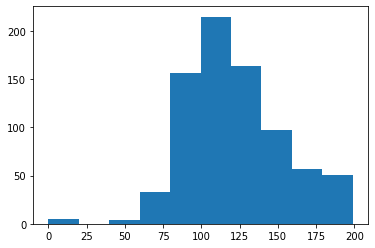

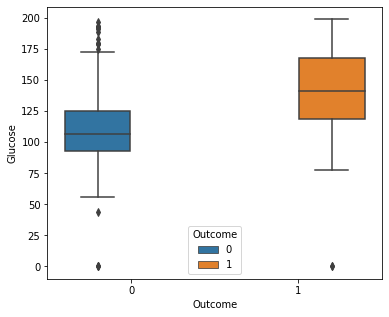

In [157]:
plt.hist(data['Glucose'], linewidth=0)
plt.figure(figsize=(6,5))
sns.boxplot(y=data['Glucose'], x = data['Outcome'], hue = data['Outcome'])

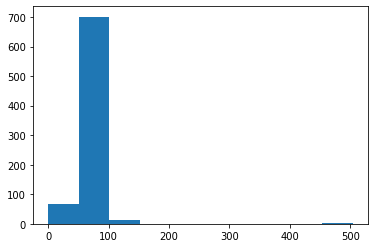

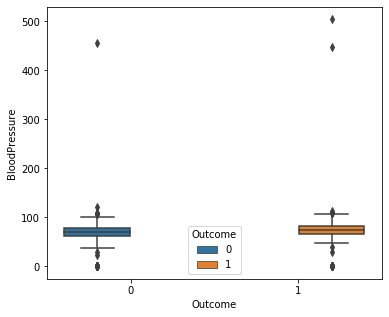

In [158]:
plt.hist(data['BloodPressure'], linewidth=0)
plt.figure(figsize=(6,5))
sns.boxplot(y=data['BloodPressure'], x = data['Outcome'], hue = data['Outcome'])

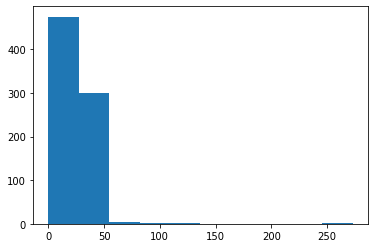

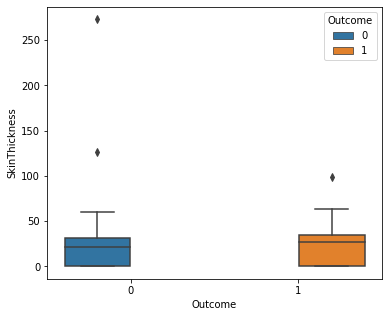

In [159]:
plt.hist(data['SkinThickness'], linewidth=0)
plt.figure(figsize=(6,5))
sns.boxplot(y=data['SkinThickness'], x = data['Outcome'], hue = data['Outcome'])

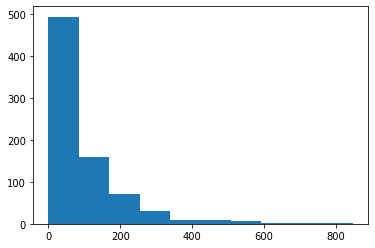

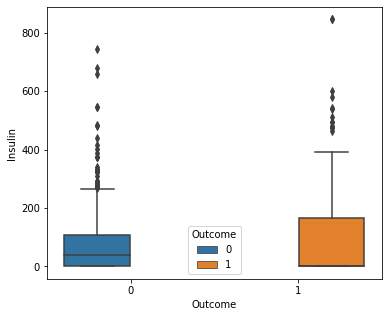

In [160]:
plt.hist(data['Insulin'], linewidth=0)
plt.figure(figsize=(6,5))
sns.boxplot(y=data['Insulin'], x = data['Outcome'], hue = data['Outcome'])

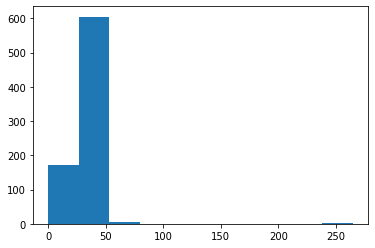

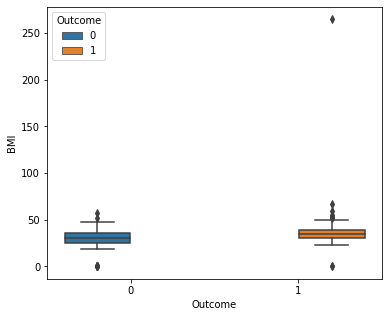

In [161]:
plt.hist(data['BMI'], linewidth=0)
plt.figure(figsize=(6,5))
sns.boxplot(y=data['BMI'], x = data['Outcome'], hue = data['Outcome'])

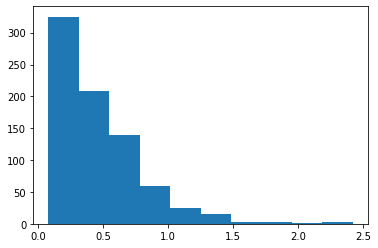

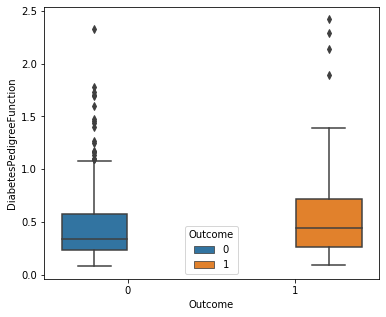

In [162]:
plt.hist(data['DiabetesPedigreeFunction'], linewidth=0)
plt.figure(figsize=(6,5))
sns.boxplot(y=data['DiabetesPedigreeFunction'], x = data['Outcome'], hue = data['Outcome'])

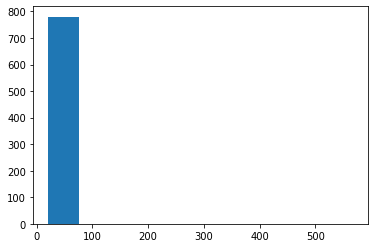

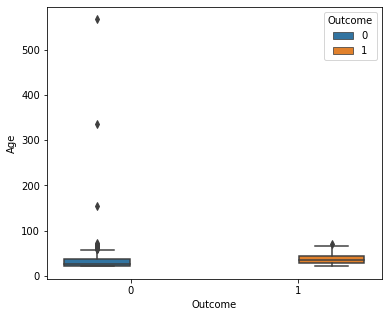

In [163]:
plt.hist(data['Age'], linewidth=0)
plt.figure(figsize=(6,5))
sns.boxplot(y=data['Age'], x = data['Outcome'], hue = data['Outcome'])

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

## Missing values
- According to the following analysis, there are no NAs in the data. 
- Glucose, BloodPressure, SkinThickness, Insulin, BMI cannot be zero, so zero represents missing value for these attributes.
- The percent of missing data for Glucose, BloodPressure, SkinThickness, Insulin, BMI are 0.6%, 4.4%, 29.6%, 48.5%, 1.4%.

In [164]:
## to check if there is NA in the data, the result showed that there are no NA in the data
a = data.isnull()
a.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [165]:
## to check how many zeros for each attribute
data_zeros = data==0
data_zeros.sum()/data.shape[0]

Pregnancies                 0.144317
Glucose                     0.006386
BloodPressure               0.044700
SkinThickness               0.296296
Insulin                     0.485313
BMI                         0.014049
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.651341
dtype: float64

## Duplicate data：
- index of duplicate data: 218, 226, 399, 408, 416, 462, 486, 521, 543, 576, 607, 613, 614, 726, 728

In [166]:
uni_data = data[data.duplicated(keep=False)]

In [167]:
uni_data = uni_data.groupby(uni_data.columns.tolist()).apply(lambda x: tuple(x.index)).tolist()
print (uni_data)

[(695, 726), (79, 521), (431, 462), (493, 607), (185, 408, 576), (370, 543), (264, 614), (285, 416), (139, 399), (276, 728), (41, 486), (140, 218, 613), (39, 226)]


# Outliers are out the normal boundies:
- Pregnancies: Q3+1.5IQR=13.5,but it is possible to be pregnant 17 times. So, there is no outliers.
- Glucose:Generally, normal blood glucose is between 3.9-6.1 mmol/L, and 70.2-109.8 after conversion. Due to our special data set, pregnant women need to be considered, and their postprandial blood glucose is generally 8.5mmol/L, which is 153 or higher after conversion. So, there is no outliers.
- BloodPressure：Q1-1.5IQR=37.5,Q3+1.5IQR=105,but it is possible to be 108.36 or 24, so outliers>110.
- SkinThickness: Q3+1.5IQR=80,so outliers>80
- Insulin: Q3+1.5IQR=325,so outliers>325
- BMI：Q3+1.5IQR=50.5,so outliers>50.5
- DiaetesPedigreeFunction:Q3+1.5IQR=1.20,so outliers>1.20
- Age: outliers > 100

Q3+1.5IQR:

In [168]:
data.quantile(.75) + 1.5*(data.quantile(.75) - data.quantile(.25))

Pregnancies                  13.5000
Glucose                     204.0000
BloodPressure               105.5000
SkinThickness                80.0000
Insulin                     325.0000
BMI                          50.4750
DiabetesPedigreeFunction      1.1995
Age                          66.5000
Outcome                       2.5000
dtype: float64

***
## Section: 2.5 - Explore the relationships among the features, excluding the outcome attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

## scatterplot
- Scatterplots are used to visually show the relationship between attributes.

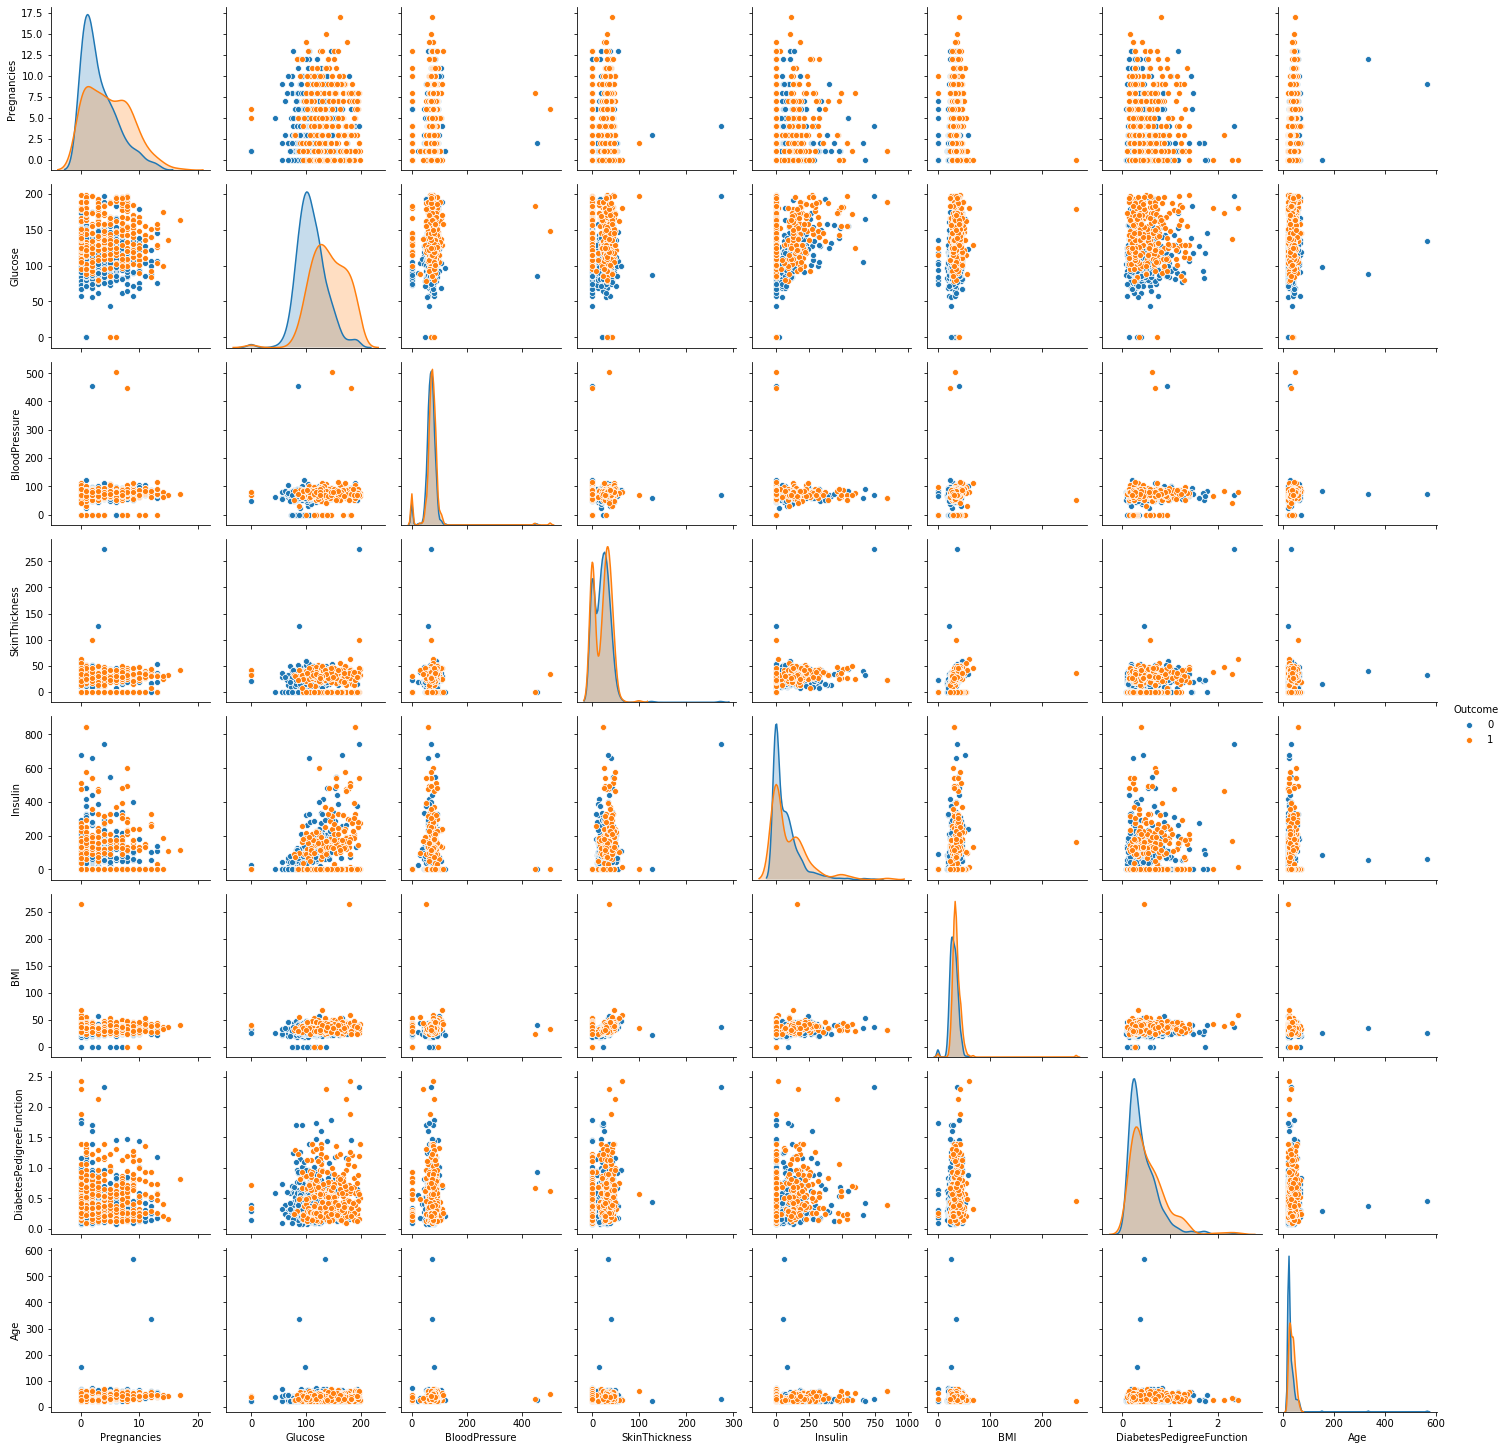

In [169]:
sns.pairplot(data, hue = "Outcome")

## Covariance
- The covariance measures the relationship between independent variables 

In [170]:
data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.335502,14.392379,11.752059,-4.657237,-34.629739,-0.535306,-0.044039,26.982239,0.368585
Glucose,14.392379,1044.928627,116.817299,42.556297,1308.061714,72.080320,1.386201,92.057829,7.190914
BloodPressure,11.752059,116.817299,984.367663,49.825022,45.028344,38.005150,0.657404,65.158710,1.103086
SkinThickness,-4.657237,42.556297,49.825022,350.900514,1010.970667,52.735691,1.563016,-10.925689,0.347464
Insulin,-34.629739,1308.061714,45.028344,1010.970667,14825.851427,189.565263,6.949617,-72.098892,6.761957
BMI,-0.535306,72.080320,38.005150,52.735691,189.565263,131.409556,0.343558,-3.317548,1.286456
DiabetesPedigreeFunction,-0.044039,1.386201,0.657404,1.563016,6.949617,0.343558,0.108962,0.033644,0.025845
Age,26.982239,92.057829,65.158710,-10.925689,-72.098892,-3.317548,0.033644,633.426257,0.981671
Outcome,0.368585,7.190914,1.103086,0.347464,6.761957,1.286456,0.025845,0.981671,0.227386


## Correlation
- Correlation normalizes the covariance by dividing the covariance by the square root of the individual variances. Therefore, the correlation ranges from -1 to +1.
- Correlation measures the linear relationship between two continuous attributes.

In [171]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132242,0.111254,-0.073844,-0.084473,-0.013870,-0.039626,0.318427,0.229581
Glucose,0.132242,1.000000,0.115182,0.070279,0.332334,0.194518,0.129911,0.113154,0.466508
BloodPressure,0.111254,0.115182,1.000000,0.084777,0.011787,0.105670,0.063477,0.082517,0.073731
SkinThickness,-0.073844,0.070279,0.084777,1.000000,0.443238,0.245583,0.252775,-0.023174,0.038899
Insulin,-0.084473,0.332334,0.011787,0.443238,1.000000,0.135811,0.172908,-0.023527,0.116461
BMI,-0.013870,0.194518,0.105670,0.245583,0.135811,1.000000,0.090792,-0.011499,0.235342
DiabetesPedigreeFunction,-0.039626,0.129911,0.063477,0.252775,0.172908,0.090792,1.000000,0.004050,0.164197
Age,0.318427,0.113154,0.082517,-0.023174,-0.023527,-0.011499,0.004050,1.000000,0.081797
Outcome,0.229581,0.466508,0.073731,0.038899,0.116461,0.235342,0.164197,0.081797,1.000000


## Correlation heatmap

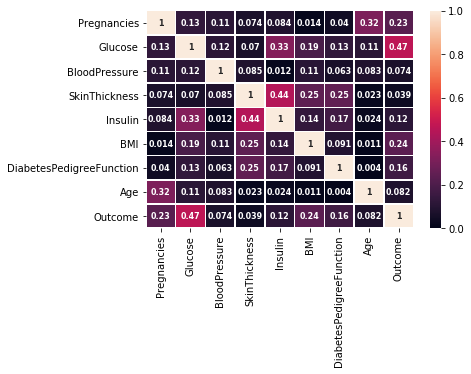

In [172]:
correction=abs(data.corr())
fig = plt.figure()
ax = sns.heatmap(correction, linewidths=0.5,vmax=1, vmin=0 ,annot=True,annot_kws={'size':8,'weight':'bold'})
plt.xticks(np.arange(9)+0.5) 
plt.yticks(np.arange(9)+0.5) 
plt.show()

 ## The relationships among the features:
 - Top three correlated feature pairs: Skin thickness & Insulin (0.44), Insulin & Glucos (0.33), Age & Pregancies (0.32).
 - Skin thickness & Insulin: A strong correlation is between these two features.
 - Insulin & Glucose: The correlation between insulin and blood glucose is high.
 - Age & Pregancies: The correlation between the number of pregnancies and age is clear. The older they get, the more pregnancies they're likely to have.

***
## Section: 2.6 - Identify and explain any interesting relationships between the outcome attribute and the other attributes.
- You may refer to earlier visualizations or create new ones. Feel free to look at $\chi^2$ values and other statsitics as you deem appropriate. 
***

## Relationships between the outcome attribute and the other attributes 
- Outcome showes the strongest correlation with Glucose. Outcome also showes the correlation with Pregancies and BMI.

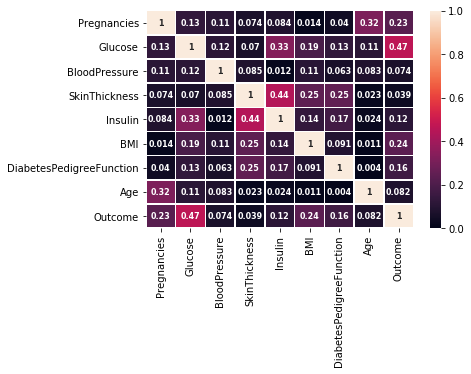

In [173]:
correction=abs(data.corr())
fig = plt.figure()
ax = sns.heatmap(correction, linewidths=0.5,vmax=1, vmin=0 ,annot=True,annot_kws={'size':8,'weight':'bold'})
plt.xticks(np.arange(9)+0.5) 
plt.yticks(np.arange(9)+0.5) 
plt.show()

***
# Section: 3 - Data Analysis
- Based on the insights gleaned in the data understanding step above, let's do some logistic regression modeling! 
- One of the final outputs should be a logistic regression model and interpration of the results.
***

***
## Section: 3.1. Data Prep
- Let's assume all duplicate records are in fact false and remove them. 
- Outliers can be handled in a variety of ways including removing the observation, setting them to NA's (if you're algorithm allows missing data) or imputation -- just to name a few. Let's change all the outliers to the median value of that feature WITHIN the specfic outcome group.  When you compute the median, be sure to exclude the missing values.
  > Why would we want to change it to the median value as opposed to the mean?
- There's a variety of ways to handle missing data. Two of them is to either drop the entire record or impute the missing value. For this scenario we'll impute the record based upon the average value for that feature WITHIN that specific outcome group.

  > Bonus points: When you fit the logistic regression, what might this imputation operation lead to in your conclusions when analyzing the logistic regression output? Be sure to consider the case for both outliers and missing data. How can yo verify that any erroneous conclusions are discovered eventually?

### Output:
- How any duplicate records are were there? Show a dataframe of which records were removed.


- How many outliers were found? Show what they were and what value they were changed to.


- Show the mean, median and std deviation of each feature after you remove duplicate records, adjust the outliers and fixed the missing values.


- Have any of the critical visualizations or relationships you discovered in section 2 changed?

***



## Remove duplicates

In [174]:
duplicates = data[data.duplicated()]
print(duplicates)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
218          8.0      188           78.0            0.0      0.0  47.9   
226         11.0      143           94.0           33.0    146.0  36.6   
399          5.0      117           92.0            0.0      0.0  34.1   
408          1.0      193           50.0           16.0    375.0  25.9   
416          4.0      110           76.0           20.0    100.0  28.4   
462          1.0      121           78.0           39.0     74.0  39.0   
486          5.0      168           64.0            0.0      0.0  32.9   
521          0.0      100           88.0           60.0    110.0  46.8   
543          2.0      100           64.0           23.0      0.0  29.7   
576          1.0      193           50.0           16.0    375.0  25.9   
607          1.0      189           60.0           23.0    846.0  30.1   
613          8.0      188           78.0            0.0      0.0  47.9   
614          3.0       84           68

In [175]:
data_noDup = data.drop_duplicates(keep='first')
data_noDup.index
data_noDup

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,144,82.0,26.0,285.0,32.0,0.452,58.0,1
1,5.0,137,108.0,0.0,0.0,48.8,0.227,37.0,1
2,5.0,109,75.0,26.0,0.0,36.0,0.546,60.0,0
3,3.0,113,50.0,10.0,85.0,29.5,0.626,25.0,0
4,2.0,96,68.0,13.0,49.0,21.1,0.647,26.0,0
...,...,...,...,...,...,...,...,...,...
778,1.0,71,48.0,18.0,76.0,20.4,0.323,22.0,0
779,2.0,112,78.0,50.0,140.0,39.4,0.175,24.0,0
780,0.0,138,0.0,0.0,0.0,36.3,0.933,25.0,1
781,4.0,183,0.0,0.0,0.0,28.4,0.212,36.0,1


## Replace all the outliers to the median value of that feature WITHIN the specfic outcome group:
As anlysed before, the outliers for attributes are:
- BloodPressure:outliers>110
- SkinThickness: outliers>80
- Insulin: outliers>325
- BMI:outliers>50.5
- DiaetesPedigreeFunction:outliers>1.20
- Age: outliers > 100

In [176]:
def change_outliers(att, outlier):
    list_a = []
    list_b = []
    outliers = []
    count = 0
    for i in data.index:
        if data.at[i,'Outcome']==0 and data.at[i,att]<=outlier and data.at[i,att]!=0:
            list_a.append(data.at[i,att])
        elif data.at[i,'Outcome']==1 and data.at[i,att]<=outlier and data.at[i,att]!=0:
            list_b.append(data.at[i,att]) 
        elif data.at[i,att]!=0 and data.at[i,att]>outlier: 
            outliers.append(data.at[i,att])
            count=count+1
    median1=np.median(list_a)
    median2=np.median(list_b)
    for i in data.index:
        if data.at[i,'Outcome']==0 and data.at[i,att]>outlier:
            data.at[i,att]= median1
        if data.at[i,'Outcome']==1 and data.at[i,att]>outlier:
            data.at[i,att]= median2
    
    print("There are", count,"outliers in", att)
    print("Their value:")
    print(outliers)
    print("Outliers should be changed to", median1,"if 'Outcome=0' or",median2, "if 'Outcome=1'")
change_outliers('BloodPressure',110)
change_outliers('SkinThickness',80)
change_outliers('Insulin',325)
change_outliers('BMI',50.5)
change_outliers('DiabetesPedigreeFunction',1.2)
change_outliers('Age',100)

There are 5 outliers in BloodPressure
Their value:
[504.0, 122.0, 114.0, 455.0, 448.0]
Outliers should be changed to 70.0 if 'Outcome=0' or 75.5 if 'Outcome=1'
There are 3 outliers in SkinThickness
Their value:
[273.0, 126.0, 99.0]
Outliers should be changed to 27.0 if 'Outcome=0' or 32.0 if 'Outcome=1'
There are 35 outliers in Insulin
Their value:
[495.0, 658.0, 600.0, 330.0, 744.0, 474.0, 370.0, 510.0, 415.0, 402.0, 375.0, 478.0, 495.0, 545.0, 387.0, 335.0, 465.0, 680.0, 485.0, 392.0, 375.0, 342.0, 328.0, 543.0, 846.0, 480.0, 579.0, 480.0, 375.0, 846.0, 440.0, 540.0, 360.0, 545.0, 326.0]
Outliers should be changed to 100.0 if 'Outcome=0' or 159.0 if 'Outcome=1'
There are 9 outliers in BMI
Their value:
[59.4, 52.9, 67.1, 52.3, 55.0, 52.3, 53.2, 264.6, 57.3]
Outliers should be changed to 30.1 if 'Outcome=0' or 34.2 if 'Outcome=1'
There are 29 outliers in DiabetesPedigreeFunction
Their value:
[2.42, 1.391, 1.781, 1.224, 2.329, 1.893, 1.321, 1.39, 1.213, 1.461, 1.394, 1.4, 1.698000000000

## Replace all the missing values to the average value of that feature WITHIN the specfic outcome group

In [177]:
def change_missing(att):
    list_a = []
    list_b = []
    for i in data.index:
        if data.at[i,'Outcome']==0 and data.at[i,att]!=0:
                list_a.append(data.at[i,att])
        if data.at[i,'Outcome']==1 and data.at[i,att]!=0:
                list_b.append(data.at[i,att])    
    mean1=np.mean(list_a)
    mean2=np.mean(list_b)
    for i in data.index:
        if data.at[i,'Outcome']==0 and data.at[i,att]==0:
            data.at[i,att]= mean1
        if data.at[i,'Outcome']==1 and data.at[i,att]==0:
            data.at[i,att]= mean2
change_missing('Glucose')
change_missing('BloodPressure')
change_missing('SkinThickness')
change_missing('Insulin')
change_missing('BMI')
change_missing('DiabetesPedigreeFunction')
change_missing('Age')
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,3.841635,122.065134,72.351896,29.145672,130.801944,32.274770,0.426966,33.197957,0.348659
std,3.366824,30.852087,11.902861,8.577008,51.715510,6.461246,0.245323,11.612032,0.476850
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,112.479705,27.600000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,112.479705,32.000000,0.361000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,32.576923,165.030303,36.400000,0.583000,41.000000,1.000000
max,17.000000,199.000000,110.000000,63.000000,325.000000,50.000000,1.191000,72.000000,1.000000


## Relationships changes compared to that in section 2

- More correlated: “Age & Pregnancies”，“Insulin & Glucose","BMI & Skinthickness"
- Less correlated: "DP functioin & Skinthickness"
- Outcome is more connected to features.

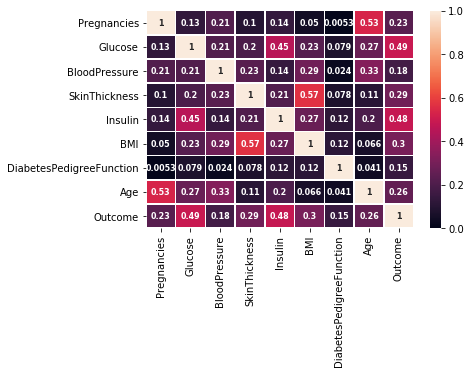

In [178]:
correlations = data.corr() 
correction=abs(correlations)
fig = plt.figure()
ax = sns.heatmap(correction, linewidths=0.5,vmax=1, vmin=0 ,annot=True,annot_kws={'size':8,'weight':'bold'})
plt.xticks(np.arange(9)+0.5) 
plt.yticks(np.arange(9)+0.5) 
plt.show()

***
## Section: 3.2 - Did you decide to implement any freature transformations? If so, why?
-  If you decided you wanted to change any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

## Use MinMax scaler to transform features
- The MinMax scaler is one of the simplest scalers to understand. It just scales all the data between 0 and 1. 

In [179]:
data_transform=data.copy()
col_names = data_transform.columns[:-1]
features = data_transform[col_names]

scaler = MinMaxScaler(feature_range=(2,4))
data_transform[col_names] = scaler.fit_transform(features.values)
data_transform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.588235,3.290323,3.348837,2.678571,3.742765,2.867925,2.672058,3.450980,1
1,2.588235,3.200000,3.953488,2.913462,2.971256,3.924528,2.267745,2.627451,1
2,2.588235,2.838710,3.186047,2.678571,2.633310,3.119497,2.840970,3.529412,0
3,2.352941,2.890323,2.604651,2.107143,2.456592,2.710692,2.984726,2.156863,0
4,2.235294,2.670968,3.023256,2.214286,2.225080,2.182390,3.022462,2.196078,0
...,...,...,...,...,...,...,...,...,...
778,2.117647,2.348387,2.558140,2.392857,2.398714,2.138365,2.440252,2.039216,0
779,2.235294,2.877419,3.255814,3.535714,2.810289,3.333333,2.174304,2.117647,0
780,2.000000,3.212903,3.191159,2.913462,2.971256,3.138365,3.536388,2.156863,1
781,2.470588,3.793548,3.191159,2.913462,2.971256,2.641509,2.240791,2.588235,1


***
## Section: 3.3 - Did you decide to create any new features? If so, why?
-  If you decided you wanted to create any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

## Create the "Skin thickness & Insulin" "Insulin & Glucos" "Insulin & Glucose" features
- Because these are the top3 most correlated feature pairs

In [180]:
data_transform['Insulin & Glucose'] = data_transform['Insulin']/data_transform['Glucose']
data_transform['Age & Pregnancies'] = data_transform['Age']/data_transform['Pregnancies']
data_transform['BMI & SkinThickness'] = data_transform['BMI']/data_transform['SkinThickness']
data_transform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin & Glucose,Age & Pregnancies,BMI & SkinThickness
0,2.588235,3.290323,3.348837,2.678571,3.742765,2.867925,2.672058,3.450980,1,1.137507,1.333333,1.070692
1,2.588235,3.200000,3.953488,2.913462,2.971256,3.924528,2.267745,2.627451,1,0.928517,1.015152,1.347033
2,2.588235,2.838710,3.186047,2.678571,2.633310,3.119497,2.840970,3.529412,0,0.927643,1.363636,1.164612
3,2.352941,2.890323,2.604651,2.107143,2.456592,2.710692,2.984726,2.156863,0,0.849937,0.916667,1.286430
4,2.235294,2.670968,3.023256,2.214286,2.225080,2.182390,3.022462,2.196078,0,0.833061,0.982456,0.985595
...,...,...,...,...,...,...,...,...,...,...,...,...
778,2.117647,2.348387,2.558140,2.392857,2.398714,2.138365,2.440252,2.039216,0,1.021430,0.962963,0.893645
779,2.235294,2.877419,3.255814,3.535714,2.810289,3.333333,2.174304,2.117647,0,0.976670,0.947368,0.942761
780,2.000000,3.212903,3.191159,2.913462,2.971256,3.138365,3.536388,2.156863,1,0.924789,1.078431,1.077195
781,2.470588,3.793548,3.191159,2.913462,2.971256,2.641509,2.240791,2.588235,1,0.783239,1.047619,0.906657


***
## Section: 3.4 - Fit a logistic regression model using the data before any transformations or additions (e.g., the data at the end of section 3.2)
- Here we want to evaluate the model. Given an interpretation and an analysis.

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 
***

In [181]:
#extract independent variables
train_cols=data.columns[:-1]
#fit the binary logit model
logit=sm.Logit(data['Outcome'],sm.add_constant(data[train_cols]))
result=logit.fit()
#display the result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.412977
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  783
Model:                          Logit   Df Residuals:                      774
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.3613
Time:                        23:36:49   Log-Likelihood:                -323.36
converged:                       True   LL-Null:                       -506.30
Covariance Type:            nonrobust   LLR p-value:                 3.694e-74
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -10.8262      0.939    -11.527      0.000     -12.667

In [182]:
#odds ratio only
print(np.exp(result.params))

const                       0.000020
Pregnancies                 1.117669
Glucose                     1.029864
BloodPressure               0.995508
SkinThickness               1.050306
Insulin                     1.018654
BMI                         1.044688
DiabetesPedigreeFunction    2.202809
Age                         1.015797
dtype: float64


In [183]:
#odds ratio and 95% CI
params=result.params
conf=result.conf_int()
conf['OR']=params
conf.columns=['2.5%','97.5%','OR']
print(np.exp(conf))

                              2.5%     97.5%        OR
const                     0.000003  0.000125  0.000020
Pregnancies               1.048902  1.190945  1.117669
Glucose                   1.022330  1.037454  1.029864
BloodPressure             0.977874  1.013460  0.995508
SkinThickness             1.021755  1.079656  1.050306
Insulin                   1.013898  1.023432  1.018654
BMI                       1.005354  1.085560  1.044688
DiabetesPedigreeFunction  1.006929  4.818976  2.202809
Age                       0.996427  1.035543  1.015797


In [184]:
predicted_probs = result.predict( sm.add_constant(data[train_cols]))
predicted_probs

0      0.943042
1      0.693584
2      0.249801
3      0.040908
4      0.009011
         ...   
778    0.006294
779    0.405975
780    0.564810
781    0.783730
782    0.859226
Length: 783, dtype: float64

In [185]:
def table(predicted_probs, labels, cutoff):
    """ Replacement for R's table funcion. """
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame({"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

table(predicted_probs, data["Outcome"], cutoff=0.5)

predicted_outcome,0,1
actual_outcome,,
0,454,56
1,90,183


In [186]:
table(predicted_probs, data["Outcome"], cutoff=0.75)

predicted_outcome,0,1
actual_outcome,,
0,489,21
1,157,116


In [187]:
#extract independent variables
train_cols=data.columns[:-1]
x=data[train_cols]
y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = LogisticRegression(fit_intercept = True, penalty = 'none',max_iter=5000).fit(x_train, y_train)
y_pred = model.predict(x_test)
print('The accurarcy score id:', accuracy_score(y_test,y_pred)*100)

The accurarcy score id: 82.16560509554141


In [188]:
model.coef_

array([[0.09912639, 0.02789423, 0.00250652, 0.05200947, 0.01867037,
        0.03696669, 0.93239291, 0.00721602]])

In [189]:
y_pre=model.predict_proba(x)
y_pre

array([[0.06239012, 0.93760988],
       [0.28054969, 0.71945031],
       [0.77816247, 0.22183753],
       ...,
       [0.3772051 , 0.6227949 ],
       [0.21955556, 0.78044444],
       [0.13273701, 0.86726299]])

In [190]:
predicted_probs-y_pre[:,1]

0      0.005433
1     -0.025866
2      0.027964
3      0.000512
4     -0.002021
         ...   
778   -0.000844
779   -0.049361
780   -0.057985
781    0.003285
782   -0.008037
Length: 783, dtype: float64

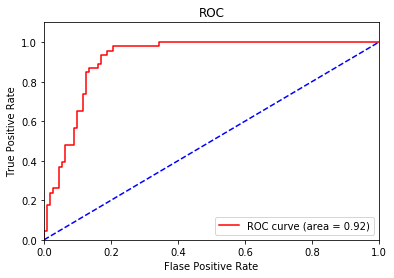

In [191]:
y_pre=model.predict_proba(x_test)
y_pre=y_pre[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pre)
auc=roc_auc_score(y_test,y_pre)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

***
## Section: 3.5 - Fit a logistic regression model using the data after your feature transformations and new variables. 
- Here we want to see if you were able to discover features that led to an improve moodel

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 

***

In [193]:
#extract independent variables
feature=data_transform.copy()
feature=feature.drop(columns=['Outcome','Insulin & Glucose','BMI & SkinThickness'])
train_cols=feature.columns
#fit the binary logit model
logit=sm.Logit(data_transform['Outcome'],sm.add_constant(data_transform[train_cols]))
result=logit.fit()
#display the result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.407974
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  783
Model:                          Logit   Df Residuals:                      773
Method:                           MLE   Df Model:                            9
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.3691
Time:                        23:39:34   Log-Likelihood:                -319.44
converged:                       True   LL-Null:                       -506.30
Covariance Type:            nonrobust   LLR p-value:                 5.534e-75
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -35.0532      4.103     -8.544      0.000     -43.095

In [194]:
#odds ratio only
print(np.exp(result.params))

const                       5.978345e-16
Pregnancies                 1.249858e+02
Glucose                     1.030245e+01
BloodPressure               8.307390e-01
SkinThickness               3.772827e+00
Insulin                     1.846371e+01
BMI                         1.948586e+00
DiabetesPedigreeFunction    1.507450e+00
Age                         2.786742e-02
Age & Pregnancies           1.622011e+04
dtype: float64


In [195]:
#odds ratio and 95% CI
params=result.params
conf=result.conf_int()
conf['OR']=params
conf.columns=['2.5%','97.5%','OR']
print(np.exp(conf))

                                  2.5%         97.5%            OR
const                     1.924220e-19  1.857407e-12  5.978345e-16
Pregnancies               7.569842e+00  2.063642e+03  1.249858e+02
Glucose                   5.807681e+00  1.827587e+01  1.030245e+01
BloodPressure             3.842430e-01  1.796070e+00  8.307390e-01
SkinThickness             1.735035e+00  8.203995e+00  3.772827e+00
Insulin                   8.885479e+00  3.836695e+01  1.846371e+01
BMI                       1.057021e+00  3.592159e+00  1.948586e+00
DiabetesPedigreeFunction  9.717034e-01  2.338579e+00  1.507450e+00
Age                       1.607476e-03  4.831136e-01  2.786742e-02
Age & Pregnancies         1.750819e+01  1.502679e+07  1.622011e+04


In [196]:
predicted_probs = result.predict( sm.add_constant(data_transform[train_cols]))
predicted_probs

0      0.927312
1      0.665653
2      0.188178
3      0.036394
4      0.008115
         ...   
778    0.005528
779    0.366754
780    0.577968
781    0.774603
782    0.885983
Length: 783, dtype: float64

In [197]:
def table(predicted_probs, labels, cutoff):
    """ Replacement for R's table funcion. """
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame({"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

table(predicted_probs, data_transform["Outcome"], cutoff=0.5)

predicted_outcome,0,1
actual_outcome,,
0,455,55
1,90,183


In [198]:
table(predicted_probs, data_transform["Outcome"], cutoff=0.75)

predicted_outcome,0,1
actual_outcome,,
0,491,19
1,160,113


In [199]:
#extract independent variables
x=data_transform[train_cols]
y=data_transform['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = LogisticRegression(fit_intercept = True, penalty = 'none',max_iter=5000).fit(x_train, y_train)
y_pred = model.predict(x_test)
print('The accurarcy score id:', accuracy_score(y_test,y_pred)*100)

The accurarcy score id: 82.80254777070064


In [200]:
model.coef_

array([[ 4.7855993 ,  2.36946933, -0.1573625 ,  1.54288015,  2.80616962,
         0.4024365 ,  0.61885111, -3.61305387,  9.5701118 ]])

In [201]:
#odds ratio only
print(np.exp(model.coef_))

[[1.19773121e+02 1.06917170e+01 8.54394284e-01 4.67804434e+00
  1.65464176e+01 1.49546395e+00 1.85679357e+00 2.69693601e-02
  1.43300184e+04]]


In [202]:
model.intercept_

array([-35.03279177])

In [203]:
y_pre=model.predict_proba(x)
y_pre

array([[0.08645683, 0.91354317],
       [0.41305076, 0.58694924],
       [0.83029221, 0.16970779],
       ...,
       [0.38664862, 0.61335138],
       [0.22546377, 0.77453623],
       [0.08949662, 0.91050338]])

In [204]:
predicted_probs-y_pre[:,1]

0      0.013769
1      0.078704
2      0.018471
3     -0.000168
4     -0.001780
         ...   
778   -0.000562
779    0.009281
780   -0.035383
781    0.000067
782   -0.024520
Length: 783, dtype: float64

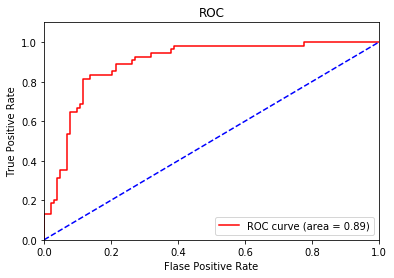

In [205]:
y_pre=model.predict_proba(x_test)
y_pre=y_pre[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pre)
auc=roc_auc_score(y_test,y_pre)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***

##  overall conclusions about the data
- The prediction results are in section 3.4 and 3.5.
- Transformation and additional of feautres improved the predition result a little but not much. (from 82.16 to 82.80).
- The accuracy of current predictions needs to be improved.

## what did I learn?
- I learned that the preprocessing of data such as replaceing missing values, outliers are important.
- I learned how to transform features.
- I learned how to implement logistic regression model and plot ROC curve.

## Future research
- I would try out more attribute transform techniques to better transform the data.
- I would accumulate more features for better prediction accuracy.
- I would imoplement more complex model such as decision tree, random forest, boost tree and deep learning to improve the prediciton accuracy.